In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# task1 and task2
df = pd.read_csv('Traffic.csv')
print(df)
y = df["Traffic Situation"]
x = df[["CarCount", "BikeCount", "BusCount", "TruckCount"]].fillna(0)
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
fe = preprocessing.LabelEncoder()
x = x.apply(fe.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
gb_model = GradientBoostingClassifier(n_estimators=82, learning_rate=1.0, max_depth=1, random_state=0)

lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

print(lr_model.score(X_train, y_train), gb_model.score(X_train, y_train))

lrpred = lr_model.predict(X_test)
gbpred = gb_model.predict(X_test)

df = {"label": y_test, "lr_predict": lrpred, "gb_predict": gbpred}
df = pd.DataFrame(data=df)
df

             Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0     12:00:00 AM    10         Tuesday        31          0         4   
1     12:15:00 AM    10         Tuesday        49          0         3   
2     12:30:00 AM    10         Tuesday        46          0         3   
3     12:45:00 AM    10         Tuesday        51          0         2   
4      1:00:00 AM    10         Tuesday        57          6        15   
...           ...   ...             ...       ...        ...       ...   
2971  10:45:00 PM     9        Thursday        16          3         1   
2972  11:00:00 PM     9        Thursday        11          0         1   
2973  11:15:00 PM     9        Thursday        15          4         1   
2974  11:30:00 PM     9        Thursday        16          5         0   
2975  11:45:00 PM     9        Thursday        14          3         1   

      TruckCount  Total Traffic Situation  
0              4     39               low  
1              3     55

,label,lr_predict,gb_predict
0,2,3.273619,2
1,1,1.730258,1
2,3,1.592659,3
3,1,0.869613,1
4,3,3.197986,3
...,...,...,...
591,0,0.482783,0
592,0,1.020495,0
593,3,3.076715,3
594,0,0.198292,0


In [3]:
# # task3
df = pd.read_csv('Traffic.csv')
x = df[['Day of the week']].fillna(0)
y = df['Traffic Situation']

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

one_hot = preprocessing.OneHotEncoder()
target_encoder = preprocessing.TargetEncoder(target_type="continuous")

y_hot = one_hot.fit_transform(x, y)
y_targ = target_encoder.fit_transform(x, y)
print(y_hot, y_targ)

  (0, 5)	1.0
  (1, 5)	1.0
  (2, 5)	1.0
  (3, 5)	1.0
  (4, 5)	1.0
  (5, 5)	1.0
  (6, 5)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 5)	1.0
  (10, 5)	1.0
  (11, 5)	1.0
  (12, 5)	1.0
  (13, 5)	1.0
  (14, 5)	1.0
  (15, 5)	1.0
  (16, 5)	1.0
  (17, 5)	1.0
  (18, 5)	1.0
  (19, 5)	1.0
  (20, 5)	1.0
  (21, 5)	1.0
  (22, 5)	1.0
  (23, 5)	1.0
  (24, 5)	1.0
  :	:
  (2951, 4)	1.0
  (2952, 4)	1.0
  (2953, 4)	1.0
  (2954, 4)	1.0
  (2955, 4)	1.0
  (2956, 4)	1.0
  (2957, 4)	1.0
  (2958, 4)	1.0
  (2959, 4)	1.0
  (2960, 4)	1.0
  (2961, 4)	1.0
  (2962, 4)	1.0
  (2963, 4)	1.0
  (2964, 4)	1.0
  (2965, 4)	1.0
  (2966, 4)	1.0
  (2967, 4)	1.0
  (2968, 4)	1.0
  (2969, 4)	1.0
  (2970, 4)	1.0
  (2971, 4)	1.0
  (2972, 4)	1.0
  (2973, 4)	1.0
  (2974, 4)	1.0
  (2975, 4)	1.0 [[2.01785113]
 [2.01785113]
 [2.01785113]
 ...
 [1.99232321]
 [2.07274568]
 [2.07274568]]


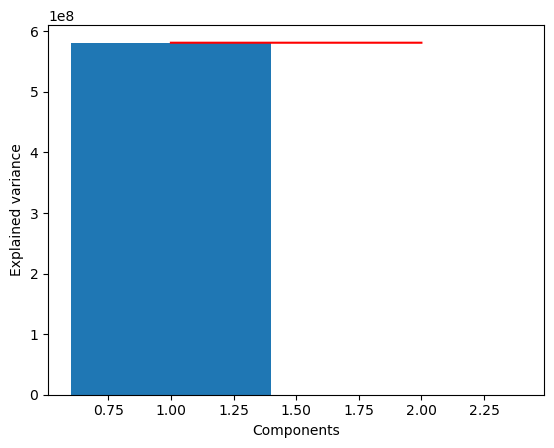

In [4]:
# task4

df = pd.read_csv('car_ad.csv', encoding='iso-8859-9')

y = df["car"]
x = df[["price", "mileage", "engV"]].fillna(0)

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(x)

plt.bar(range(1, len(pcamodel.explained_variance_) + 1), pcamodel.explained_variance_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(
    range(1, len(pcamodel.explained_variance_) + 1),
    np.cumsum(pcamodel.explained_variance_),
    c='red'
)
plt.show()